In [53]:
# Imports
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
def load_raw_data(txt_filename: str) -> pd.DataFrame:
    """ Loads the .txt data from the Data folder as pandas DataFrame 
        :argument: txt_filename - name of the text file with .txt extension
        :return: dataframe - pandas DataFrame
    """
    # Define the data folder path
    data_path = Path().absolute().parent.joinpath('data', 'raw')
    # Open with pandas without header and space as separator
    dataframe = pd.read_csv(data_path.joinpath(txt_filename), sep=' ', header=None).dropna(axis=1, how='all')
    # Define number of sensor columns
    sensors_number = len(dataframe.columns) - 5
    # Rename the columns to corrensponding value
    column_names = ['unit', 'cycle', 'altitude', 'mach', 'tra'] + [f'sensor_{i}' for i in range(1, sensors_number + 1)]
    dataframe.columns = column_names
    return dataframe

def create_target(raw_data: pd.DataFrame) -> pd.DataFrame:
    """ Creates the RUL target variable based on max cycles from the dataset 
        :argument: raw_data - Pandas DataFrame containing training data
        :return: dataset - Pandas DataFrame containing training data and target variable
    """
    data = raw_data.copy()
    # Group the data by unit column and calculate the max cycle
    grouped = data.groupby('unit')
    max_cycle = grouped['cycle'].max()
    # Merge the max cycle back to the data
    data = data.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit', right_index=True)
    # Calculate difference between max cycle and current cycle, create RUL
    data['rul'] = data['max_cycle'] - data['cycle']
    # Drop the max cycle column
    data.drop('max_cycle', axis=1, inplace=True)
    return data

def plot_histogram(data: pd.DataFrame, column: str, unit: str = None) -> None:
    """ Plots the histogram for specified column grouped by unit """
    if column == 'rul':
        data = data[['unit', column]].groupby('unit').max().reset_index()
        unit = None
    if unit:
        data = data[data['unit'] == unit]
    data[column].hist(bins=15, figsize=(10,6))
    plt.xlabel(column)
    plt.show()
    
def plot_sensors(input_data: pd.DataFrame, sensor_names: list, unit: str = None) -> None:
    """ Plots the sensor values for given sensor name over the RUL """
    data = input_data.copy()
    if len(sensor_names) != 4:
        return "Specify 4 sensor names"
    fig, axs = plt.subplots(2, 2, figsize=(20,10))
    if unit:
        data = data[data['unit'] == unit]
    else:
        max_unit = data['unit'].max()
        random_units = np.random.randint(1, max_unit, size=5)
        #data = data[data['unit'].isin(random_units.tolist())]
        print('Random units: ', random_units)
    for i in range(2):
        for j in range(2):
            k = 0
            if i == 1:
                k = 1 
            sensor_name = sensor_names[j+i+k]
            for unit_number in random_units.tolist():
                axs[i,j].plot('rul', sensor_name, data=data[data['unit'] == unit_number])
            axs[i,j].set_xlim(data['rul'].max(), 0) 
            axs[i,j].set_ylabel(sensor_name)
            axs[i,j].set_xlabel('RUL')
            axs[i,j].set_title(sensor_name)
    plt.show()

In [144]:
raw_data = load_raw_data('train_FD004.txt')
data = create_target(raw_data)

In [38]:
#data.describe().transpose()

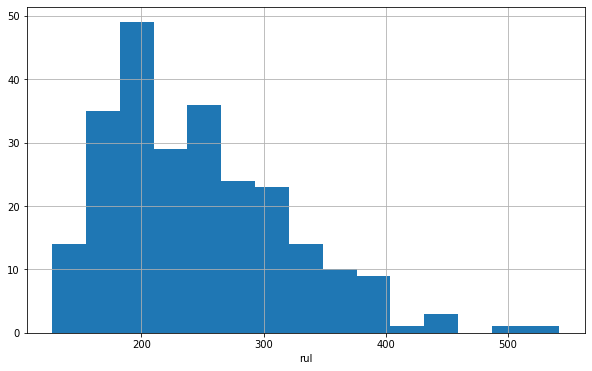

In [103]:
plot_histogram(data, 'rul')

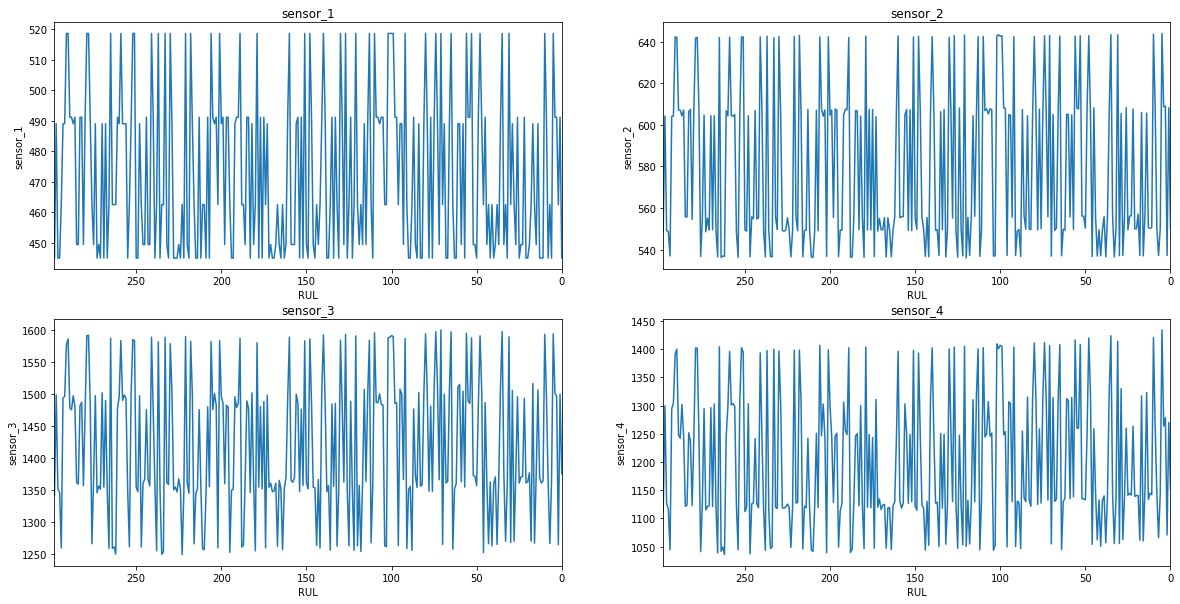

In [157]:
selected_unit = 2
sensors = ['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4']
plot_sensors(data, sensors, unit=selected_unit)

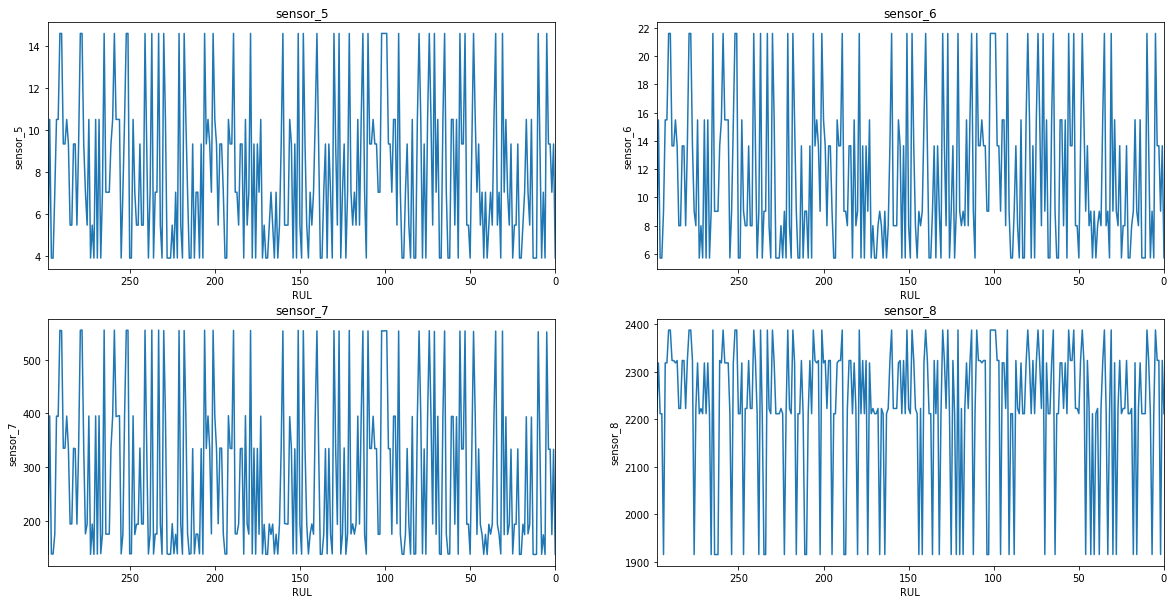

In [158]:
sensors = ['sensor_5', 'sensor_6', 'sensor_7', 'sensor_8']
plot_sensors(data, sensors, unit=selected_unit)

Random units:  [149 205 102 117 143]


ValueError: array([102, 117, 143, 149, 205], dtype=int64) is not a valid value for color

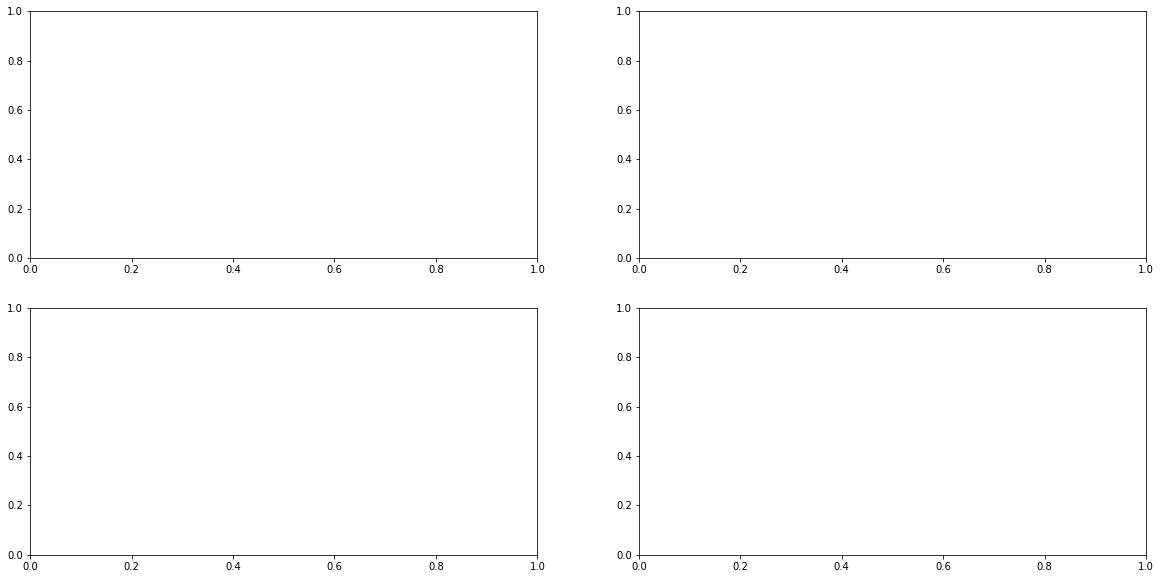

In [164]:
sensors = ['sensor_5', 'sensor_6', 'sensor_7', 'sensor_8']
plot_sensors(data, sensors)